# Compute Drawdown

In [134]:
import pandas as pd
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                    header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 20', "Hi 20"]]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line

<bound method PlotAccessor.line of <pandas.plotting._core.PlotAccessor object at 0x0000024BFCFEEAF0>>

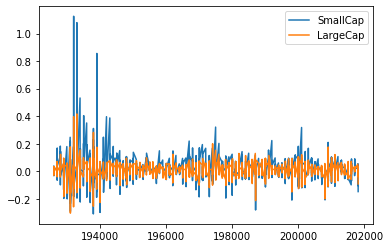

In [135]:
rets.plot.line()

In [136]:
rets.head()

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [137]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [138]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316


In [139]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [140]:
# rets.index = rets.index.to_period('M')
# rets.head()

In [141]:
rets = rets["1999":"2015"]
rets.head()

,SmallCap,LargeCap
1999-01-01,0.1114,0.0153
1999-02-01,-0.0399,-0.0172
1999-03-01,-0.0308,0.0368
1999-04-01,0.0824,0.0679
1999-05-01,0.0435,-0.0048


In [142]:
rets.index

DatetimeIndex(['1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', length=204, freq=None)

In [143]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1999-01-01 to 2015-12-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  204 non-null    float64
 1   LargeCap  204 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute Drawdowown = wealth value as a % of the previous peak

In [153]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
wealth_index.head()

1999-01-01    1015.300000
1999-02-01     997.836840
1999-03-01    1034.557236
1999-04-01    1104.803672
1999-05-01    1099.500614
Name: LargeCap, dtype: float64

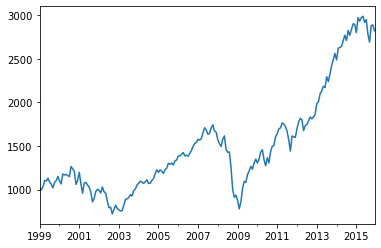

In [154]:
wealth_index.plot()

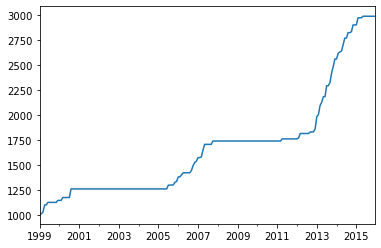

In [155]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

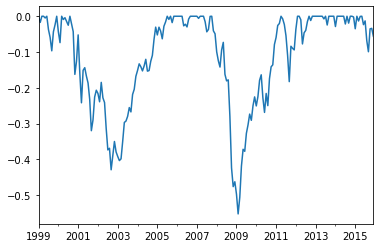

In [156]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [157]:
drawdown.head()

1999-01-01    0.0000
1999-02-01   -0.0172
1999-03-01    0.0000
1999-04-01    0.0000
1999-05-01   -0.0048
Name: LargeCap, dtype: float64

In [158]:
drawdown.min()

-0.5527349978713653

In [159]:
drawdown.idxmin()

Timestamp('2009-02-01 00:00:00')

In [160]:
drawdown["1975":].idxmin()

Timestamp('2009-02-01 00:00:00')

In [161]:
drawdown.idxmin()

Timestamp('2009-02-01 00:00:00')

In [162]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawadowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
        
    })

In [163]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].head()

,Wealth,Peaks
1999-01-01,1015.300000,1015.300000
1999-02-01,997.836840,1015.300000
1999-03-01,1034.557236,1034.557236
1999-04-01,1104.803672,1104.803672
1999-05-01,1099.500614,1104.803672


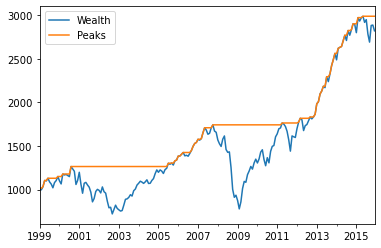

In [164]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].plot()

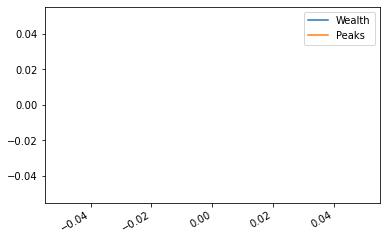

In [165]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth", "Peaks"]].plot()

In [166]:
drawdown(rets["LargeCap"])["Drawdown"].min()


-0.5527349978713653

In [167]:
drawdown(rets["SmallCap"])["Drawdown"].min()

-0.6248092431236988

In [168]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Timestamp('2009-02-01 00:00:00')

In [43]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Timestamp('2009-02-01 00:00:00')